# 1. Amazon Beauty Dataset Exploration

This notebook explores the Amazon Beauty dataset used for S3Rec with Low-rank AAP.

In [5]:
import sys
sys.path.insert(0, '..')

import pickle
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load Data

In [6]:
data_path = Path('../data/processed/beauty_processed.pkl')

if data_path.exists():
    with open(data_path, 'rb') as f:
        data = pickle.load(f)
    print("Loaded processed data!")
    print(f"Users: {data['num_users']:,}")
    print(f"Items: {data['num_items']:,}")
    print(f"Attributes: {data['num_attributes']:,}")
else:
    print("Data not found. Run preprocessing first.")

Loaded processed data!
Users: 22,363
Items: 12,102
Attributes: 2,320


## Sequence Length Analysis

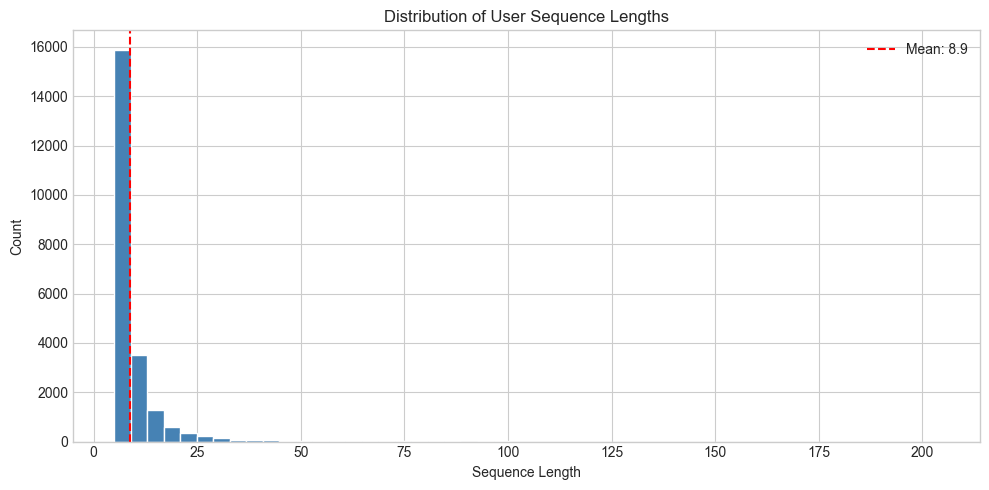

Min: 5, Max: 204, Mean: 8.88


In [7]:
if 'data' in dir():
    seq_lengths = [len(seq) for seq in data['user_sequences'] if seq]
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.hist(seq_lengths, bins=50, color='steelblue', edgecolor='white')
    ax.axvline(np.mean(seq_lengths), color='red', linestyle='--', label=f'Mean: {np.mean(seq_lengths):.1f}')
    ax.set_xlabel('Sequence Length')
    ax.set_ylabel('Count')
    ax.set_title('Distribution of User Sequence Lengths')
    ax.legend()
    plt.tight_layout()
    plt.savefig('../results/figures/sequence_lengths.png', dpi=150)
    plt.show()
    
    print(f"Min: {np.min(seq_lengths)}, Max: {np.max(seq_lengths)}, Mean: {np.mean(seq_lengths):.2f}")

## Attribute Analysis

In [8]:
if 'data' in dir():
    item2attrs = data['item2attributes']
    attr_counts = [len(attrs) for attrs in item2attrs.values()]
    
    print(f"Avg attributes per item: {np.mean(attr_counts):.2f}")
    print(f"Items with 0 attributes: {sum(1 for c in attr_counts if c == 0)}")

Avg attributes per item: 3.94
Items with 0 attributes: 0
